In [1]:
# Importing necessary libraries for data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing machine learning models and evaluation tools from scikit-learn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
# Loading the dataset from the specified path
df = pd.read_csv(r"C:\Users\ashis\Downloads\letter-recognition.csv")

# Displaying the first few rows to understand the structure of the dataset
df.head()


,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [4]:
# Checking for missing values in each column
missing_values = df.isnull().sum()

# Printing the results
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64


In [5]:
# Displaying data types and overall structure of the DataFrame
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
# Extracting the feature matrix (X) and target vector (y)
X = df.iloc[:, 1:].values   # All columns except the first (features)
y = df.iloc[:, 0].values    # The first column (labels)

# Displaying the shapes of X and y to confirm the extraction
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)


Feature matrix shape: (20000, 16)
Target vector shape: (20000,)


In [7]:
# Splitting the data into training (80%) and test (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Displaying the number of samples in the training and test sets
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])


Training set size: 16000
Test set size: 4000


In [8]:
# Scaling features to standardize the input data
from sklearn.preprocessing import StandardScaler

# Creating a scaler instance
scaler = StandardScaler()

# Fitting the scaler on the training data and transforming both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Displaying the shapes of the scaled datasets for confirmation
print("Scaled training data shape:", X_train_scaled.shape)
print("Scaled test data shape:", X_test_scaled.shape)


Scaled training data shape: (16000, 16)
Scaled test data shape: (4000, 16)


In [9]:
# Performing cross-validation on multiple models for initial comparison
from sklearn.model_selection import cross_val_score

# Defining a set of baseline models for comparison
models = {
    "SVM": SVC(),  # Support Vector Machine with default parameters
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=1),
    "Random Forest": RandomForestClassifier(random_state=1),
    "KNN": KNeighborsClassifier()
}

# Evaluating each model using 5-fold cross-validation on the scaled training data
print("Initial Model Comparison (5-fold CV):")
for name, model in models.items():
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    print(f"{name} - CV Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


Initial Model Comparison (5-fold CV):
SVM - CV Accuracy: 0.9378 (+/- 0.0053)
Logistic Regression - CV Accuracy: 0.7761 (+/- 0.0066)
Random Forest - CV Accuracy: 0.9580 (+/- 0.0020)
KNN - CV Accuracy: 0.9373 (+/- 0.0017)


In [10]:
# Hyperparameter tuning for Random Forest using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Defining a parameter grid for Random Forest tuning
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Creating a Random Forest classifier instance
rf_model = RandomForestClassifier(random_state=1)

# Setting up GridSearchCV for the Random Forest model
grid_search_rf = GridSearchCV(estimator=rf_model,
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              n_jobs=-1,
                              verbose=1)

# Fitting GridSearchCV on the scaled training data
grid_search_rf.fit(X_train_scaled, y_train)

# Displaying the best parameters and best CV accuracy for Random Forest
print("Best parameters for Random Forest:", grid_search_rf.best_params_)
print("Best CV accuracy for Random Forest: {:.4f}".format(grid_search_rf.best_score_))


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Best CV accuracy for Random Forest: 0.9591


In [11]:
# Retrieving the best model from GridSearchCV
best_rf_model = grid_search_rf.best_estimator_

# Training the best Random Forest model on the full training data
best_rf_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_rf = best_rf_model.predict(X_test_scaled)

# Calculating and displaying the accuracy on the test set
from sklearn.metrics import accuracy_score
test_accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Tuned Random Forest Test Accuracy: {:.4f}".format(test_accuracy_rf))


Tuned Random Forest Test Accuracy: 0.9627


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Defining a parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

# Creating an SVC instance
svm_model = SVC()

# Setting up GridSearchCV for the SVM model
grid_search_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fitting GridSearchCV on the scaled training data
grid_search_svm.fit(X_train_scaled, y_train)

# Displaying the best parameters and best CV accuracy for SVM
print("Best parameters for SVM:", grid_search_svm.best_params_)
print("Best CV accuracy for SVM: {:.4f}".format(grid_search_svm.best_score_))


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV accuracy for SVM: 0.9663


In [13]:
# Retrieving the best model from GridSearchCV
best_svm_model = grid_search_svm.best_estimator_

# Training the best SVM model on the full training data
best_svm_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Calculating and displaying the accuracy on the test set
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Tuned SVM Test Accuracy: {:.4f}".format(test_accuracy_svm))


Tuned SVM Test Accuracy: 0.9725


In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Defining a parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Creating a KNN instance
knn_model = KNeighborsClassifier()

# Setting up GridSearchCV for the KNN model
grid_search_knn = GridSearchCV(
    estimator=knn_model,
    param_grid=param_grid_knn,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fitting GridSearchCV on the scaled training data
grid_search_knn.fit(X_train_scaled, y_train)

# Displaying the best parameters and best CV accuracy for KNN
print("Best parameters for KNN:", grid_search_knn.best_params_)
print("Best CV accuracy for KNN: {:.4f}".format(grid_search_knn.best_score_))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for KNN: {'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
Best CV accuracy for KNN: 0.9491


C:\Users\ashis\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1103: UserWarning: One or more of the test scores are non-finite: [      nan 0.94625   0.939625  0.9456875       nan 0.9490625 0.93725
 0.9440625       nan 0.9490625 0.9348125 0.9415          nan 0.9464375
 0.9306875 0.938875 ]
  warnings.warn(


In [15]:
# Retrieving the best model from GridSearchCV
best_knn_model = grid_search_knn.best_estimator_

# Training the best KNN model on the full training data
best_knn_model.fit(X_train_scaled, y_train)

# Making predictions on the test set
y_pred_knn = best_knn_model.predict(X_test_scaled)

# Calculating and displaying the accuracy on the test set
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Tuned KNN Test Accuracy: {:.4f}".format(test_accuracy_knn))


Tuned KNN Test Accuracy: 0.9510


=== Final Test Accuracies ===
Random Forest: 0.9627
SVM:           0.9725
KNN:           0.9510

=== Random Forest ===
Classification Report:
              precision    recall  f1-score   support

           A       0.99      1.00      1.00       162
           B       0.90      0.96      0.93       152
           C       1.00      0.98      0.99       144
           D       0.90      0.97      0.93       156
           E       0.95      0.98      0.96       139
           F       0.93      0.96      0.95       144
           G       0.98      0.97      0.97       154
           H       0.92      0.92      0.92       146
           I       0.96      0.96      0.96       138
           J       0.98      0.96      0.97       141
           K       0.92      0.94      0.93       137
           L       0.96      0.99      0.98       139
           M       0.97      0.97      0.97       145
           N       0.98      0.91      0.95       161
           O       0.95      0.95      0.95    

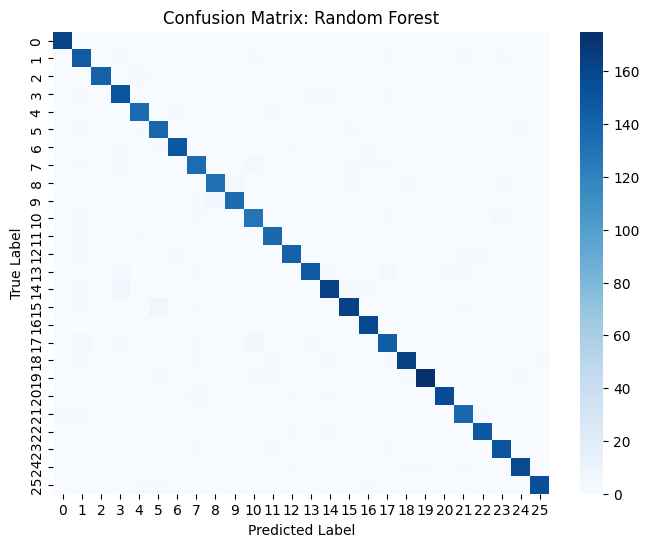


=== SVM ===
Classification Report:
              precision    recall  f1-score   support

           A       1.00      1.00      1.00       162
           B       0.91      0.96      0.94       152
           C       0.99      0.99      0.99       144
           D       0.92      0.98      0.95       156
           E       0.94      0.99      0.96       139
           F       0.95      0.98      0.97       144
           G       0.97      0.97      0.97       154
           H       0.94      0.92      0.93       146
           I       0.96      0.97      0.96       138
           J       0.98      0.96      0.97       141
           K       0.94      0.96      0.95       137
           L       0.96      0.97      0.96       139
           M       0.98      0.99      0.98       145
           N       0.99      0.96      0.97       161
           O       0.99      0.97      0.98       173
           P       1.00      0.94      0.97       174
           Q       0.99      1.00      0.99  

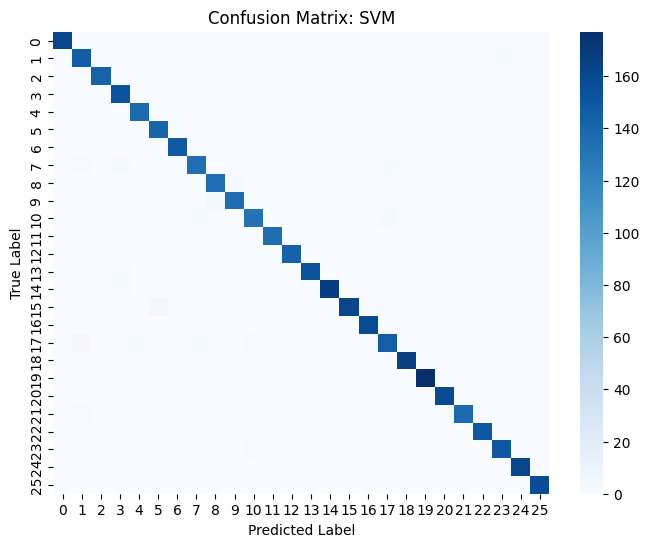


=== KNN ===
Classification Report:
              precision    recall  f1-score   support

           A       1.00      0.99      0.99       162
           B       0.87      0.95      0.91       152
           C       0.99      0.97      0.98       144
           D       0.88      0.98      0.93       156
           E       0.92      0.98      0.95       139
           F       0.95      0.92      0.94       144
           G       0.96      0.97      0.96       154
           H       0.88      0.87      0.88       146
           I       0.94      0.95      0.95       138
           J       0.96      0.94      0.95       141
           K       0.90      0.88      0.89       137
           L       0.98      0.97      0.97       139
           M       0.97      0.97      0.97       145
           N       0.97      0.87      0.92       161
           O       0.97      0.93      0.95       173
           P       0.96      0.93      0.95       174
           Q       0.95      0.99      0.97  

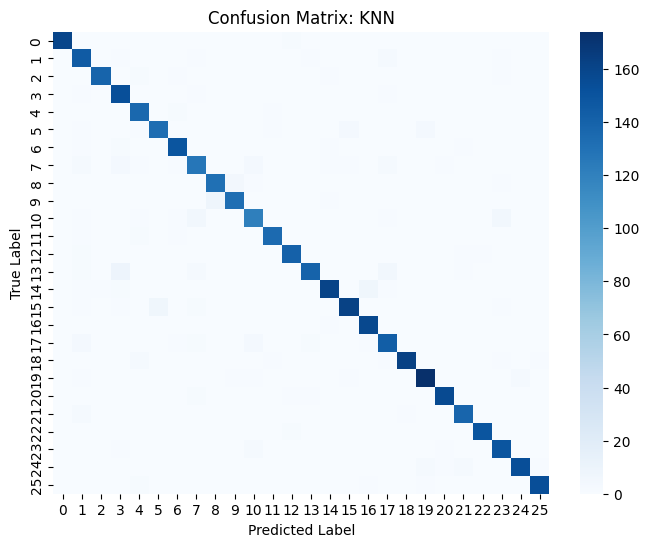

In [16]:
from sklearn.metrics import classification_report, confusion_matrix

# Printing the final test accuracies for each tuned model
print("=== Final Test Accuracies ===")
print(f"Random Forest: {test_accuracy_rf:.4f}")
print(f"SVM:           {test_accuracy_svm:.4f}")
print(f"KNN:           {test_accuracy_knn:.4f}")

# Creating a dictionary for easy iteration
tuned_models = {
    "Random Forest": (best_rf_model, y_pred_rf),
    "SVM": (best_svm_model, y_pred_svm),
    "KNN": (best_knn_model, y_pred_knn),
}

# Generating classification reports and confusion matrices
for model_name, (model_obj, y_pred) in tuned_models.items():
    print(f"\n=== {model_name} ===")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Creating and displaying the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=False, cmap='Blues', fmt='d')
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


   Feature  Importance
12  xedge     0.120248
14  yedge     0.099018
8   y2bar     0.093263
7    x2bar    0.083769
11  xy2bar    0.082320
10  x2ybar    0.080047
9   xybar     0.073867
13  xedgey    0.072982
6    ybar     0.068869
15  yedgex    0.054979
5    xbar     0.052837
4   onpix     0.026804
1    ybox     0.025118
2   width     0.023142
0    xbox     0.022465
3   height    0.020271


C:\Users\ashis\AppData\Local\Temp\ipykernel_15336\1686748627.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


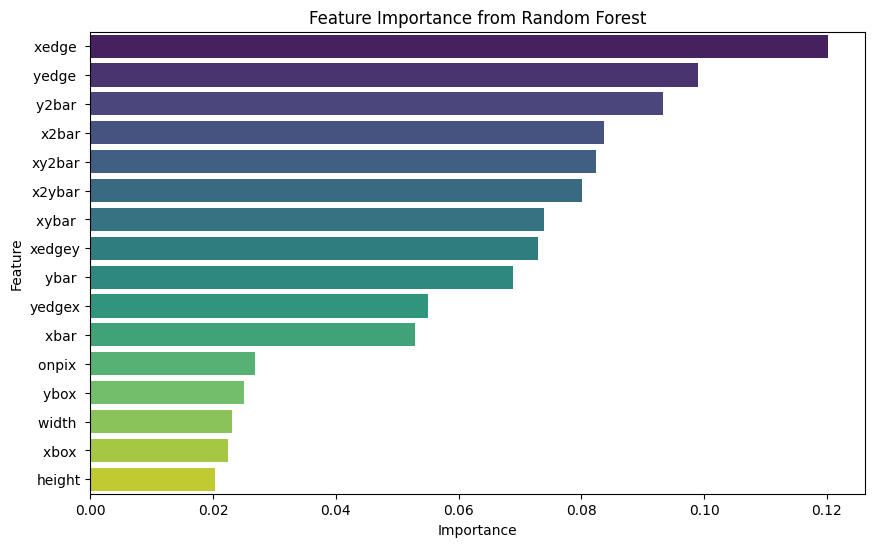

In [17]:
# Extracting feature importances from the best Random Forest model
importances = best_rf_model.feature_importances_

# Creating a DataFrame for better visualization of feature importances
# Assuming the feature names correspond to the columns in the dataset (excluding the first label column)
feature_names = df.columns[1:]
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sorting the features by their importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Plotting the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
